In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


nc_df = pd.read_csv("Resources/NC-Accidents.csv")
nc_df.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,512402,A-512403,MapQuest,241.0,3,2019-03-03 18:18:55,2019-03-03 18:48:19,35.241394,-80.850349,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
1,513350,A-513351,MapQuest,201.0,3,2019-03-04 04:50:16,2019-03-04 05:19:52,35.673294,-80.856918,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
2,513351,A-513352,MapQuest,201.0,2,2019-03-04 05:12:57,2019-03-04 05:42:43,35.080902,-80.850151,NaN,...,False,False,False,False,True,False,Night,Night,Night,Night
3,513352,A-513353,MapQuest,201.0,2,2019-03-04 05:37:25,2019-03-04 06:07:10,35.202320,-80.832909,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
4,513353,A-513354,MapQuest,201.0,2,2019-03-04 06:31:12,2019-03-04 07:01:00,35.252460,-80.643356,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day


In [100]:
nc_df = nc_df.drop(columns={"TMC","Timezone","Wind_Speed(mph)",
                    "Wind_Direction","End_Lat","End_Lng","Number",
                   "State","Country","Zipcode","Airport_Code","Wind_Chill(F)",
                   "Precipitation(in)"})

In [101]:
#nc_df.count()

## Heat Map of NC

In [102]:
# Create a duplicate of the nc_df to wrangle with
new_df = nc_df

In [103]:
# Replace county names with FIPS (Federal Information Processing Standards)
# Allows us to later create a heatmap based on our analysis
new_df=new_df.replace({"County": {"Alamance":37001,"Alexander":37003,"Alleghany":37005,"Anson":37007,"Ashe":37009,
    "Avery":37011,"Beaufort":37013,"Bertie":37015,"Bladen":37017,"Brunswick":37019,"Buncombe":37021,"Burke":37023,"Cabarrus":37025,
    "Caldwell":37027,"Camden":37029,"Carteret":37031,"Caswell":37033,"Catawba":37035,"Chatham":37037,"Cherokee":37039,
    "Chowan":37041,"Clay":37043,"Cleveland":37045,"Columbus":37047,"Craven":37049,"Cumberland":37051,"Currituck":37053,
    "Dare":37055,"Davidson":37057,"Davie":37059,"Duplin":37061,"Durham":37063,"Edgecombe":37065,"Forsyth":37067,
    "Franklin":37069,"Gaston":37071,"Gates":37073,"Graham":37075,"Granville":37077,"Greene":37079,"Guilford":37081,
    "Halifax":37083,"Harnett":37085,"Haywood":37087,"Henderson":37089,"Hertford":37091,"Hoke":37093,"Hyde":37095,
    "Iredell":37097,"Jackson":37099,"Johnston":37101,"Jones":37103,"Lee":37105,"Lenoir":37107,"Lincoln":37109,"McDowell":37111,
    "Macon":37113,"Madison":37115,'Martin':37117,'Mecklenburg':37119,'Mitchell':37121,'Montgomery':37123,'Moore':37125,
    'Nash':37127,'New Hanover':37129,'Northampton':37131,'Onslow':37133,'Orange':37135,'Pamlico':37137,'Pasquotank':37139,
    'Pender':37141,'Perquimans':37143,'Person':37145,'Pitt':37147,'Polk':37149,'Randolph':37151,'Richmond':37153,
    'Robeson':37155,'Rockingham':37157,'Rowan':37159,'Rutherford':37161,'Sampson':37163,'Scotland':37165,'Stanly':37167,
    'Stokes':37169,'Surry':37171,'Swain':37173,'Transylvania':37175,'Tyrrell':37177,'Union':37179,'Vance':37181,
    'Wake':37183,'Warren':37185,'Washington':37187,'Watauga':37189,'Wayne':37191,'Wilkes':37193,'Wilson':37195,
    'Yadkin':37197,'Yancey':37199}})

In [107]:
# Counts the amount of accidents that occurs per county
a = new_df.County.value_counts()

In [108]:
# Creates a dataframe of our value counts that allows us to call upon FIPS and Counts
a = a.rename_axis('FIPS').reset_index(name='Counts')
a.head()

,FIPS,Counts
0,37119,55457
1,37183,40618
2,37081,2459
3,37067,1250
4,37063,1173


In [114]:
# Import our dependencies to create the heatmap using plotly, pandas, and numpy 
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly as py
import numpy as np
import pandas as pd

values = a['Counts'].tolist()
fips = a['FIPS'].tolist()

# Label the colors used in the heatmap in relations to our bins
colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

# Uses plotly's create_choropleth function
fig = ff.create_choropleth(
    # Use values the FIPS column to locate which counties to color depending on it's value
    fips=fips,
    
    values=values,
    # Scope allows for our heatmap to only consider NC and uses the NC map for our heatmap
    scope=['NC'], 
    
    # Set our colors that we want to use in the graph
    colorscale=colorscale,
    
    # Label our bins [<100,100-500, ...]
    binning_endpoints=[100,500,1000,2500,58000], 
    
    # Set our background color of our map
    plot_bgcolor='rgb(229,229,229)',
    
    # Set our background color of our legend
    paper_bgcolor='rgb(229,229,229)',
    
    # Title the legend
    legend_title='Number of Accidents by County',
    
    # Set the color for the outline of the counties
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    
    # Label the title of the heatmap
    title="North Carolina"
)
fig.layout.template = None
fig.show()

## Street Pie Chart

In [115]:
# Identify street names
# nc_df["Street"]

In [70]:
new_df["Highway"] = new_df["Street"].str.contains("Highway|US-|NC-")

In [71]:
new_df["Interstate"] = new_df["Street"].str.contains("I-")

In [72]:
new_df["Road"] = ~new_df["Street"].str.contains("Highway|US-|I-|NC-")

In [73]:
Road_type = new_df[new_df.columns[-3:]]
Road_type.head()

,Highway,Interstate,Road
0,False,True,False
1,False,True,False
2,False,False,True
3,False,False,True
4,False,False,True


In [74]:
bool_col=[col for col in Road_type.columns if Road_type[col].dtype ==np.dtype('bool')]
traffic_object_df= Road_type[bool_col]
traffic_objects=traffic_object_df.sum(axis=0)

In [75]:
traffic_objects

Highway        5845
Interstate    12347
Road          90724
dtype: int64

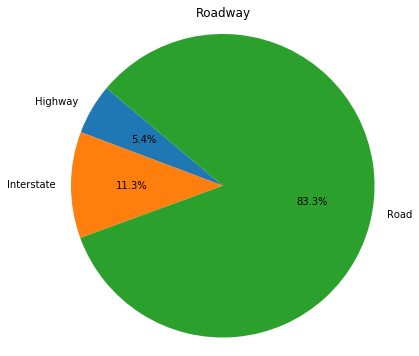

In [98]:
traffic_objects.plot.pie(figsize=(6,6),autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title('Roadway')
plt.ylabel("")
plt.xlabel("")

plt.savefig('Road_Traffic.png')

## Street Bar Graph

In [78]:
top_10_street = new_df["Street"].value_counts().nlargest(10)

In [84]:
top_10_street = top_10_street.rename_axis('Street').reset_index(name='Number of Accidents')

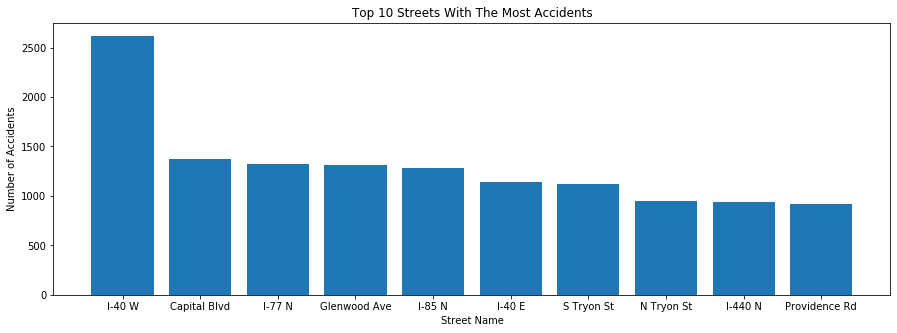

In [94]:
plt.figure(figsize=(15, 5)) 
plt.bar(top_10_street["Street"],top_10_street["Number of Accidents"])
plt.ylabel("Number of Accidents")
plt.xlabel("Street Name")
plt.title("Top 10 Streets With The Most Accidents")

plt.savefig("Top 10 Streets.png")